In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import thinkstats2
import thinkplot
from sklearn.metrics import mean_squared_error
import scipy.stats as ss

import statsmodels.formula.api as sm

# Central Limit Theorem and Non-Normal Data


The Central Limit Theorem is one of the important concepts of statistics, and something that we have addressed in a backdoor way while doing simulations. The definition from Wikipedia states, "In probability theory, the central limit theorem (CLT) establishes that, in many situations, when independent random variables are summed up, their properly normalized sum tends toward a normal distribution even if the original variables themselves are not normally distributed. The theorem is a key concept in probability theory because it implies that probabilistic and statistical methods that work for normal distributions can be applicable to many problems involving other types of distributions."

In more common language, the CLT states:
<ul>
<li>When independent random samples are taken, the distribution of their means approaches normal as more samples are taken. 
<li>The mean of the sample will equal the mean of the population. 
<li>The standard deviation of the sample will equal the standard deviation of the population divided by the root of the sample size.
</ul>

We can use this as a shortcut to help analyze data that is not normal, or where we don't know the distribution. 

#### Load Data

We will use the assessments data from the city as an example. 

In [3]:
#Note: the filter here takes out large values. This works fine either way, but with the large outliers in there, visualizing
#is less effective, due to the range. 
# Also, if a sample includes one $20 property randomly, that will have a big impact. 
df = pd.read_csv("data/Assessments.csv")
df = df[df['Assessed Value']<1000000]
df = df[df['Assessed Value']>20000]
df.sort_values("Assessed Value", ascending=False).head()

,Account Number,Suite,House Number,Street Name,Garage,Neighbourhood ID,Neighbourhood,Ward,Assessed Value,Latitude,Longitude
5281,1113737,NaN,525.0,SECORD BOULEVARD NW,N,4487.0,SECORD,Ward 1,999500,53.536185,-113.704181
301978,10258057,NaN,4405.0,WINGFIELD CAPE NW,Y,5570.0,WINDERMERE,Ward 9,999500,53.448727,-113.610375
149191,7422108,NaN,11120.0,75 AVENUE NW,Y,5290.0,MCKERNAN,Ward 8,999500,53.511599,-113.517812
325007,10505293,NaN,650.0,HOWATT DRIVE SW,Y,5465.0,HAYS RIDGE AREA,Ward 9,999000,53.420364,-113.568871
304071,10225013,NaN,3333.0,CAMERON HEIGHTS LANDING NW,Y,4466.0,CAMERON HEIGHTS,Ward 5,999000,53.472654,-113.631789


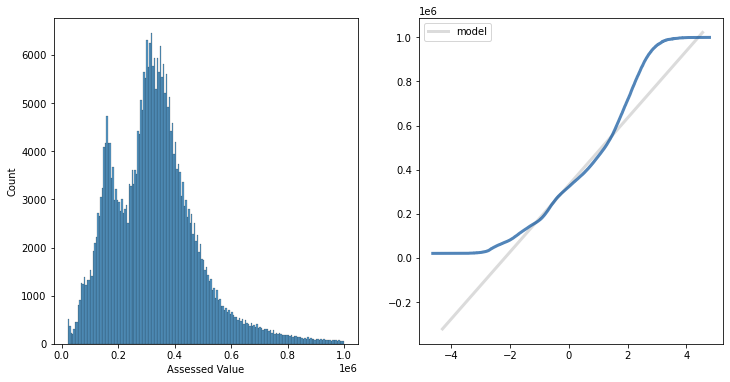

In [4]:
#Visualize Distribution and a normality plot
thinkplot.PrePlot(2,1,2)
sns.histplot(df["Assessed Value"])
thinkplot.SubPlot(2)
thinkstats2.NormalProbabilityPlot(df["Assessed Value"])
thinkplot.Config()

#### Distribution Results

Based on both visualizations, the data is pretty clearly not normal. 

How do we deal with this non-normal data? We have the data of the population here, so we can just calculate it. In reality though, this isn't normally the case. Think about looking at items where we can't capture the population data and are relying on a sample exclusively:
<ul>
<li>The gorilla example from the book, where we can only tranquilize and assess a small fraction of the total populations.
<li>Any survey type data, short of a full census. We only get responses from part of the population.
<li>Scientific measurements, where we have only a few examples.
</ul>

In any of these cases we don't have the distribution of the population, and we really can't get it with confidence in any reasonable way. This is where the CLT comes in handy - we can trust the the results of our samples will be normal, then use that to infer about the entire population. The distribution of the means being normal means that we can rely on all the implicit powers of the normal distribution analytical tools.

We can call back to our estimation days and generate some samples... Each sample will grab n records from the population, calculate the mean of that sample of data, place all of the means into a list, then visualize that distribution of means. 

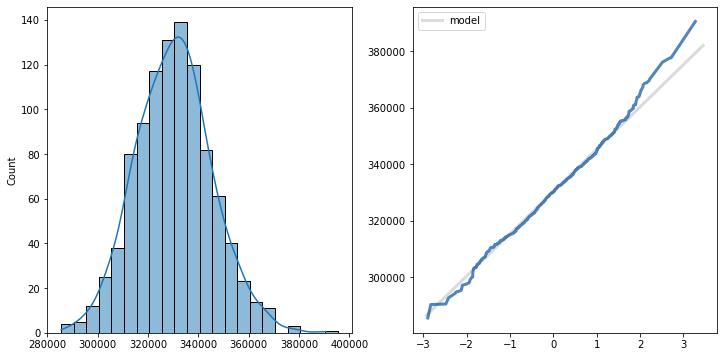

In [5]:
#Take some samples 
i = 0
n = 100
total = 1000
means = []

while i < total:
    tmp = df["Assessed Value"].sample(n)
    means.append(tmp.mean())
    i += 1

thinkplot.PrePlot(2,1,2)
sns.histplot(means, binwidth=5000, kde=True)
thinkplot.SubPlot(2)
thinkstats2.NormalProbabilityPlot(means)
thinkplot.Config()

#### Sampling Results

Taking a bunch of samples delivered us a stack of means. We can run some calculations to see how well we did. The means should be pretty close, that's part of the power of the CLT! The standard deviation of the samples are also the standard error, indicating our expected accuracy. If we increase the n, that SE should go down.

In [6]:
popMean = df["Assessed Value"].mean()
popStd = df["Assessed Value"].std()
estMean = np.mean(means)
estSE = np.std(means)
print("Population Mean:", popMean)
print("Population Std:", popStd)
print("\n")
print("Estimate Mean:", estMean)
print("Estimate SE:", estSE)

Population Mean: 331128.99929439713
Population Std: 151758.49092570547


Estimate Mean: 330348.495
Estimate SE: 14996.767480359726


### Normality status - Increased!

The means of the samples are pretty normal, even if the underlying distribution isn't. The normal distribution is common (hence the normal part), but everything in life isn't normally distributed, as we've seen. 
<ul>
<li> Incomes can often be represented with a lognormal distribution. 
<li> Property assessments here have a bimodal distribution (two humps).
<li> Some things we may want to look at have a distribution that we just don't know at all!
</ul>


### Application of CLT

One place that the CLT is important is in hypothesis testing, most visably in the testing that we did with our simulations. We take repeated samples from the data in each of the loops that we created to do those tests and take the mean of each sample. Statistical tests like the t-test are parametric, assuming the data is normally distributed, and this repeated sample and mean operation ensures that normality assumption is valid. We can use the normal distribution based calculations of the p-value, representing the likelihood of the compared samples being similar due to randomness, because of this fact! This application of the CLT in hypothesis testing is one of the foundations that modern science was built on!!

## CLT in Full Effect

The example above shows the idea behind the CLT - we can take samples and use them to estimate for a population. We are comfortable with this idea from all the estimation stuff. 

The analytical piece of the CLT is also really handy - we can replicate similar results without all the sampling. Taking 100 or 1000 samples presents similar problems to trying to measure the whole population - it can be hard, time consuming, expensive, or impossible. We can build a function that calculates the CLT directly, and compare the results. We also 

In [7]:
#Calculable CLT
def clt(data):
    mean = np.mean(data)
    se = np.std(data) / np.sqrt(len(data))
    return (mean, se)

In [32]:
#Run CLT Calculation with 1 Sample
#Compare with results above
n1 = 1000
cltRes = clt(df["Assessed Value"].sample(n1))
print("CLT Mean:", cltRes[0])
print("CLT SE:", cltRes[1])
print("CLT Est Std:", cltRes[1]*np.sqrt(n1))
print("\n")
print("Population Mean:", popMean)
print("Population Std:", popStd)
print("\n")
print("Estimate Mean:", estMean)
print("Estimate SE:", estSE)

CLT Mean: 340467.0
CLT SE: 4853.149123095231
CLT Est Std: 153470.05053429806


Population Mean: 331128.99929439713
Population Std: 151758.49092570547


Estimate Mean: 330348.495
Estimate SE: 14996.767480359726


In [9]:
#Exercise

#Rerun with a few different N values to see the changes 

<h3>CLT is Quick</h3>

We can run a bunch of simulations like we did while estimating, but this is way quicker!

Try it for some random distribution...

<AxesSubplot:ylabel='Count'>

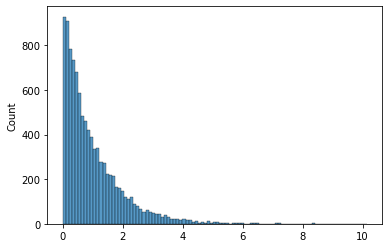

In [10]:
#Generate random Exponential Dist - put into a Series for ease of use later. 
expoDist = pd.Series(ss.expon.rvs(size=10000))
sns.histplot(expoDist)

In [11]:
cltExp = clt(expoDist.sample(n))
print("CLT Mean:", cltExp[0])
print("CLT SE:", cltExp[1])
print("CLT Est Std:", cltExp[1]*np.sqrt(n))
print("\n")
print("Dist Mean:", expoDist.mean())
print("Dist Std:", expoDist.std())

CLT Mean: 0.9877131256872262
CLT SE: 0.09500022952441099
CLT Est Std: 0.95000229524411


Dist Mean: 0.9990511325913792
Dist Std: 1.0023041168414406


That's the magic of the CLT - we can rely on our smallish sample far more than we might think! 

Because this works, we can also harness some of the other useful assumptions of normality, like confidence intervals. Going back to the assessments from above, how confident can we be about our estimate of the mean? What is the 90 confidence interval?

In [12]:
#Directly calculate confidence intervals.
ci1low = ss.norm.ppf(.05, loc=cltRes[0], scale=cltRes[1])
ci1hi = ss.norm.ppf(.95, loc=cltRes[0], scale=cltRes[1])
ci1low, ci1hi

(329951.44479597645, 334958.55520402355)

And if we compare that to the predictions based on estimation?

In [13]:
cdf = thinkstats2.Cdf(means)
cdf.Percentile(.05), cdf.Percentile(.95)

(285455.0, 296260.0)

The exact difference will vary a bit, due to randomness, but we should expect the CI bands to be slightly worse than the estimation example - but we only did one sample! Using the CLT allows us to much more quickly infer about the population when we don't have access to large numbers of samples. 

### Exercise - Try One

Use the CLT to calculate the mean and std from a sample of the salary column below. 

In [14]:
df_sal = pd.read_csv("data/spain_salary.csv")
df_sal.head()

,year,state,gender,statistic,gross_income_euros
0,2017,nationwide,both,mean,23646.50
1,2016,nationwide,both,mean,23156.34
2,2015,nationwide,both,mean,23106.30
3,2014,nationwide,both,mean,22858.17
4,2013,nationwide,both,mean,22697.86


Plot the data, is it normal? 

<AxesSubplot:xlabel='gross_income_euros', ylabel='Count'>

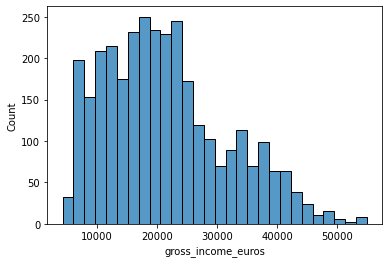

In [15]:
sns.histplot(df_sal["gross_income_euros"])

use CLT to generate mean and std estimates. Compare to a direct calcuation of the population. 

In [16]:
#Use CLT to infer 
cltInc = clt(df_sal["gross_income_euros"].sample(n))
print("CLT Mean:", cltInc[0])
print("CLT SE:", cltInc[1])
print("CLT Est Std:", cltInc[1]*np.sqrt(n))
print("\n")
print("Dist Mean:", df_sal["gross_income_euros"].mean())
print("Dist Std:", df_sal["gross_income_euros"].std())

CLT Mean: 20361.199399999998
CLT SE: 874.0917030579665
CLT Est Std: 8740.917030579665


Dist Mean: 21357.354592592623
Dist Std: 10194.037847187157


And the 85% confidence interval?

In [17]:
#Generate 85% CI for salary
#85% = 7.5 to 92.5
ci2low = ss.norm.ppf(.075, loc=cltInc[0], scale=cltInc[1])
ci2hi = ss.norm.ppf(.925, loc=cltInc[0], scale=cltInc[1])
ci2low, ci2hi

(19102.91688496186, 21619.481915038134)

<h1>Common Transformations - Box Cox</h1>

Another strategy to deal with non-normal data is to just do a transformation to make it more normal. We saw this before in one of the sample datasets where we were provided with a log_income value, which changed a lognormal distribution of income into a normal distribution that is easier to analyze. 

These types of transformations are somewhat of a one-off, what makes a distribution normal will differ. One common method is Box-Cox, which raises values to some value - lambda. E.g. if lambda is 2, the original data is squared, if lambda is .5 the original data is square rooted. Lambda can be between -5 and 5. 

This process is something that we can utilize scipy to automate - it will give us back a transformation and the optimal lambda. It tests multiple values of lambda, and determines which is most normal using a normality test. 

In [18]:
#Load some data
def process_time(row):
    
    call_received = datetime.datetime.strptime(row['date_time_received'].split('+')[0], '%Y-%m-%dT%H:%M:%S')
    call_ended    = datetime.datetime.strptime(row['date_time_complete'].split('+')[0], '%Y-%m-%dT%H:%M:%S')
    
    time_ellapsed = call_ended - call_received

    row['Parsed Call Received'] = str(call_received)
    row['Parsed Call Ended'] = str(call_ended)
    row['Time Ellapsed'] = str(time_ellapsed)
    row['Time Ellapsed (minutes)'] = round(time_ellapsed.total_seconds() / 60, 1)

    return row

import requests
import io
import datetime
base_url = 'https://aegis4048.github.io/downloads/notebooks/sample_data/'
filename = '08c32c03-9d88-42a9-b8a1-f493a644b919_NRCEventReporting-Calls-2010.csv'
data = requests.get(base_url + filename).content
df_   = pd.read_csv(io.StringIO(data.decode('utf-8')))

parsed_df = df_.iloc[11000: 12000, :].apply(process_time, axis=1).iloc[:, -4:]
parsed_df['Parsed Call Received'] = pd.to_datetime(parsed_df['Parsed Call Received'], format='%Y-%m-%d %H:%M:%S')
parsed_df['Parsed Call Ended'] = pd.to_datetime(parsed_df['Parsed Call Ended'], format='%Y-%m-%d %H:%M:%S')
parsed_df = parsed_df.sort_values(by = 'Parsed Call Received')

new_parsed_df = parsed_df.drop_duplicates(subset=['Parsed Call Received'], keep=False)
df2 = new_parsed_df.copy()
df2.head()

,Parsed Call Received,Parsed Call Ended,Time Ellapsed,Time Ellapsed (minutes)
11000,2010-05-21 19:32:09,2010-05-21 19:43:35,0:11:26,11.4
11001,2010-05-21 19:54:40,2010-05-21 19:58:40,0:04:00,4.0
11002,2010-05-21 20:03:14,2010-05-21 20:09:11,0:05:57,6.0
11003,2010-05-21 20:04:26,2010-05-21 20:07:39,0:03:13,3.2
11004,2010-05-21 20:18:38,2010-05-21 20:27:45,0:09:07,9.1


<AxesSubplot:xlabel='Time Ellapsed (minutes)', ylabel='Count'>

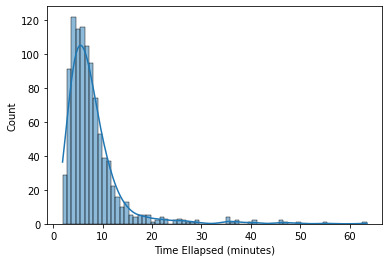

In [19]:
#Visualize call time
calls = pd.Series(df2["Time Ellapsed (minutes)"])
sns.histplot(calls, kde=True)

-0.3217312319999393


<AxesSubplot:ylabel='Count'>

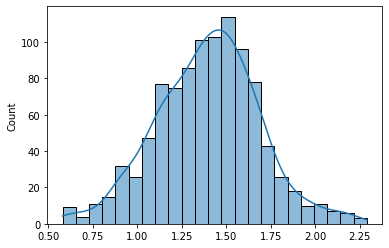

In [20]:
transCalls, lmbda = ss.boxcox(calls)
print(lmbda)
sns.histplot(transCalls, kde=True)

Much more normal!

<h3>Application - Control Charts</h3>

One use of a transformation like this would be to monitor and detect things that fall outside the normal expected bounds. This data is from a call center, we may want to see when calls fall outside a specified range. Going in however, we don't have a cutoff - we can use the distribution to tell us how many are outside of 3std. This is common in lots of quality control/manufacturing types of scenarios. 

The control chart has a normality assumption, because the idea behind it is based off of the standard deviation. We want to "catch" things that are over X standard deviations from normal. If you've heard of Six Sigma, that's based on the same idea - to manufacture things to "six sigmas" of quality (or without error): roughly 99.99966%. This type of transformation to normal for a control chart is a common thing. For more info: https://www.isixsigma.com/tools-templates/control-charts/non-normal-data-needs-alternate-control-chart-approach/ 

In [21]:
#Set # of standard deviations to draw control lines. 
limit = 2.5

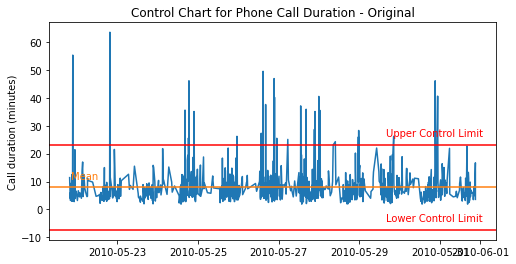

In [22]:
#Non-transformed control chart. 
y = new_parsed_df['Parsed Call Received'].values
mean = np.mean(calls)
std  = np.std(calls)

upper_limit = mean + limit * std
lower_limit = mean - limit * std
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(y, calls)

ax.axhline(mean, color='C1')
ax.axhline(upper_limit, color='r')
ax.axhline(lower_limit, color='r');
ax.text(y[-200], upper_limit + 3, 'Upper Control Limit', color='r')
ax.text(y[-200], lower_limit + 3, 'Lower Control Limit', color='r')
ax.text(y[3], mean + 3, 'Mean', color='C1')
ax.set_ylabel('Call duration (minutes)');
ax.set_title('Control Chart for Phone Call Duration - Original');

This isn't super helpful. The lower limits are negative, the control limits seem random. Not great. 

We can make one with transformed data. 

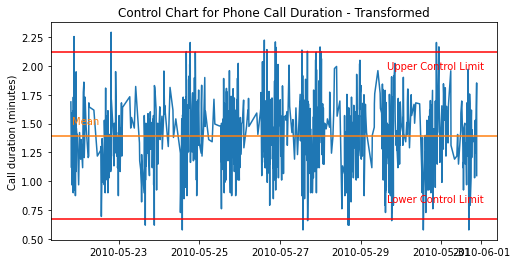

In [23]:
#Transformed control chart. 
mean_trans = np.mean(transCalls)
std_trans  = np.std(transCalls)

upper_limit_trans = mean_trans + limit * std_trans
lower_limit_trans = mean_trans - limit * std_trans
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(y, transCalls)

ax.axhline(mean_trans, color='C1')
ax.axhline(upper_limit_trans, color='r')
ax.axhline(lower_limit_trans, color='r');
ax.text(y[-200], upper_limit_trans - 0.15, 'Upper Control Limit', color='r')
ax.text(y[-200], lower_limit_trans + 0.15, 'Lower Control Limit', color='r')
ax.text(y[3], mean_trans + 0.1, 'Mean', color='C1')
ax.set_ylabel('Call duration (minutes)');
ax.set_title('Control Chart for Phone Call Duration - Transformed');

Way better! Now the control lines are useful. This is something that is really done in practice. 

Now, we don't really care about the transformed data specifically, we care about the real values. How do we go backwards? Call the inverse transformation. 

<AxesSubplot:ylabel='Count'>

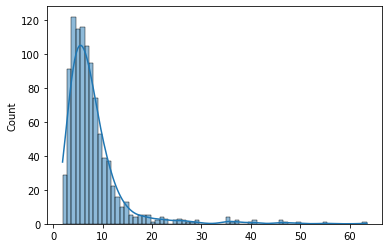

In [24]:
#Reverse the transformation. 
from scipy.special import inv_boxcox
backTrans = inv_boxcox(transCalls, lmbda)
sns.histplot(backTrans, kde=True)

Voila! Back where we started. 

Why? We can transform some data to make it normal to utilize any normal-based analysis on the data. We can more easily do hypothesis testing, control charts, confidence intervals, etc...

Using the benefits of normality can help us out!